In [1]:
import tensorflow as tf   
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
import cifar10
from sklearn import datasets
from tensorflow.python.util.tf_export import keras_export
import tensorflow as tf
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
tf.keras.datasets.cifar10.load_data()

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [4]:
cifar10 = tf.keras.datasets.cifar10

In [5]:
cifar10=cifar10.load_data()

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
#print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [7]:
x_train, x_test = x_train / 255.0, x_test / 255.0
# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()

In [8]:
print("images_train= ", x_train.shape)
print("class_train= ", y_train.shape)


images_train=  (50000, 32, 32, 3)
class_train=  (50000,)


In [9]:
x_test.shape

(10000, 32, 32, 3)

In [10]:
x_images_training=x_train[:, :, :, 0]
x_train=x_images_training.reshape((50000, 32*32))
y_train=y_train
print(x_train.shape)
print(y_train.shape)
print(x_images_training.shape)

(50000, 1024)
(50000,)
(50000, 32, 32)


In [11]:
x_train.max()

1.0

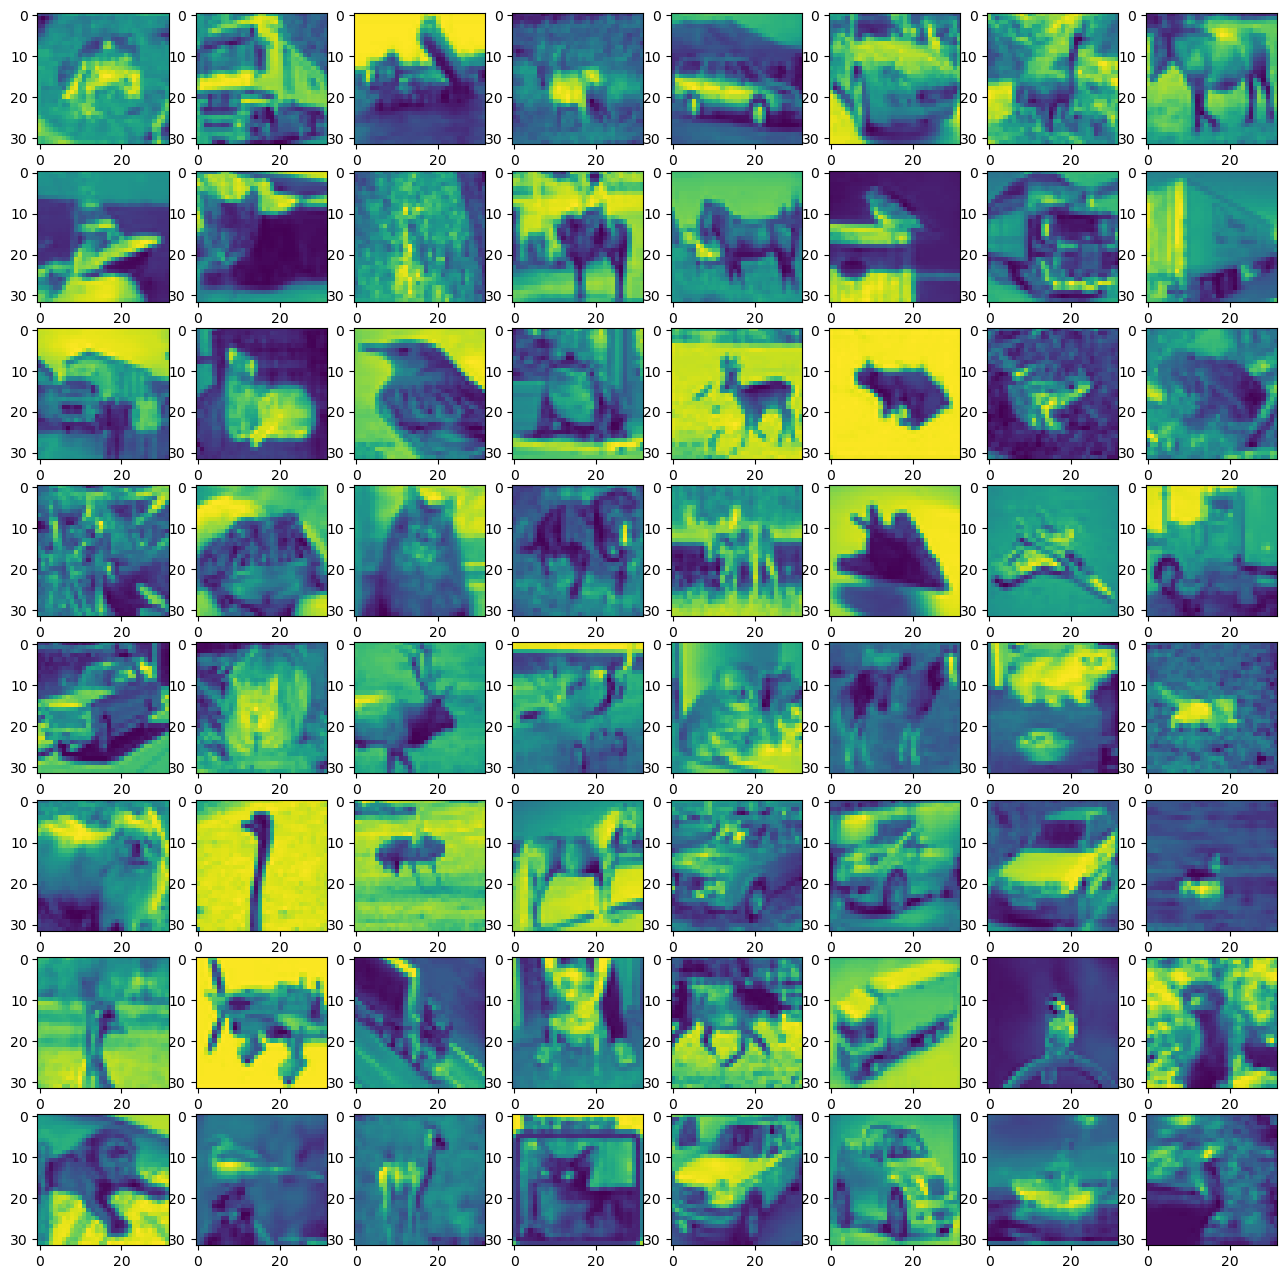

In [12]:
fig=plt.figure(figsize=(16, 16))
for i in range(64):
    ax=fig.add_subplot(8, 8, i+1)
    ax.imshow(x_images_training[i])
plt.show()

In [13]:
pca=PCA(whiten=True)
pca.fit(x_train)

PCA(whiten=True)

In [14]:
k=0
current=0
total=sum(pca.explained_variance_)
while current/total<0.99:
    current+=pca.explained_variance_[k]
    k+=1
k

429

In [15]:
pca_cifar=PCA(n_components=k, whiten=True)
x_train_transformed=pca_cifar.fit_transform(x_train)

In [16]:
x_train_transformed.shape

(50000, 429)

In [17]:
print(x_test.shape)
print(y_test.shape)
#print(labels_test.shape)

(10000, 32, 32, 3)
(10000,)


In [18]:
x_images_test=x_test[:, :, :, 0]
x_test=x_images_test.reshape((10000, 32*32))
y_test=y_test
print(x_test.shape)
print(y_test.shape)
print(x_images_test.shape)

(10000, 1024)
(10000,)
(10000, 32, 32)


In [19]:
x_test_transformed=pca_cifar.transform(x_test)

In [20]:
x_test_transformed.shape

(10000, 429)

In [21]:
x_test.max()

1.0

In [22]:
SVC()

SVC()

In [23]:
clf1=RandomForestClassifier(n_estimators=429, n_jobs=-1, max_depth=2000, max_leaf_nodes=2350)

In [24]:
clf1.fit(x_train_transformed, y_train)

In [25]:
y_test_predicted1=clf1.predict(x_test_transformed)

In [26]:
clf2=LogisticRegression(n_jobs=-1, multi_class="auto")

In [27]:
clf2.fit(x_train_transformed, y_train)
print("Done")

Done


In [28]:
y_test_predicted2=clf2.predict(x_test_transformed)

In [29]:
clf3=KNeighborsClassifier(n_jobs=-1)

In [30]:
clf3.fit(x_train_transformed, y_train)
print("Done")

Done


In [31]:
y_test_predicted3=clf3.predict(x_test_transformed)

In [32]:
clf4=SVC(tol=0.0001)

In [33]:
clf4.fit(x_train_transformed, y_train)

In [34]:
y_test_predicted4=clf4.predict(x_test_transformed)

In [35]:
dic=dict()
ans=[]
for i in range(len(class_names)):
    dic[i]=class_names[i]
for i in range(len(y_test_predicted1)):
    arr=np.array([y_test_predicted1[i], y_test_predicted2[i], y_test_predicted3[i], y_test_predicted4[i]])
    ans.append(dic[np.argmax(np.bincount(arr))])

In [36]:
np.savetxt(fname="file.csv", X=ans, delimiter=',', fmt="%s")